## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [8]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.99, 0.5, 0.1]
redice_lr_patient = [3,5,10]

In [9]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.99, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 1s - loss: 1.1992 - acc: 0.5856 - val_loss: 1.4435 - val_acc: 0.4951
Epoch 17/25
50000/50000 [==============================] - 1s - loss: 1.1807 - acc: 0.5920 - val_loss: 1.4453 - val_acc: 0.4931
Epoch 18/25
50000/50000 [==============================] - 1s - loss: 1.1602 - acc: 0.6014 - val_loss: 1.4402 - val_acc: 0.4923
Epoch 19/25
50000/50000 [==============================] - 1s - loss: 1.1424 - acc: 0.6070 - val_loss: 1.4318 - val_acc: 0.4974
Epoch 20/25
50000/50000 [==============================] - 1s - loss: 1.1240 - acc: 0.6127 - val_loss: 1.4293 - val_acc: 0.4970
Epoch 21/25
50000/50000 [==============================] - 1s - loss: 1.1050 - acc: 0.6205 - val_loss: 1.4352 - val_acc: 0.49880.6 - ETA: 0s - loss: 1.1039 - a
Epoch 22/25
50000/50000 [==============================] - 1s - loss: 1.0896 - acc: 0.6263 - val_loss: 1.4451 - val_acc: 0.4999
Epoch 23/25
50000/50000 [==============================] - 1s - loss: 1.0722 - acc: 

50000/50000 [==============================] - 1s - loss: 1.4621 - acc: 0.4886 - val_loss: 1.5945 - val_acc: 0.4340
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.4256 - acc: 0.5001 - val_loss: 1.5511 - val_acc: 0.4510
Epoch 8/25
50000/50000 [==============================] - 1s - loss: 1.3925 - acc: 0.5113 - val_loss: 1.5203 - val_acc: 0.4614
Epoch 9/25
50000/50000 [==============================] - 1s - loss: 1.3631 - acc: 0.5227 - val_loss: 1.5033 - val_acc: 0.4704
Epoch 10/25
50000/50000 [==============================] - 1s - loss: 1.3351 - acc: 0.5332 - val_loss: 1.4861 - val_acc: 0.4740
Epoch 11/25
50000/50000 [==============================] - 1s - loss: 1.3106 - acc: 0.5418 - val_loss: 1.4774 - val_acc: 0.4757
Epoch 12/25
50000/50000 [==============================] - 1s - loss: 1.2857 - acc: 0.5511 - val_loss: 1.4692 - val_acc: 0.4818
Epoch 13/25
50000/50000 [==============================] - 1s - loss: 1.2636 - acc: 0.5580 - val_loss: 1.4639 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s - loss: 2.3931 - acc: 0.2299 - val_loss: 2.1803 - val_acc: 0.1825
Epoch 2/25
50000/50000 [==============================] - 1s - loss: 1.8924 - acc: 0.3484 - val_loss: 2.0499 - val_acc: 0.2730
Epoch 3/25
50000/50000 [==============================] - 1s - loss: 1.7535 - acc: 0.3910 - val_loss: 1.9080 - val_acc: 0.3365
Epoch 4/25
50000/50000 [==============================] - 1s - loss: 1.6790 - acc: 0.4139 - val_loss: 1.7952 - val_acc: 0.3731
Epoch 5/25
50000/50000 [==============================] - 1s - loss: 1.6245 - acc: 0.4321 - val_loss: 1.7138 - val_acc: 0.3975
Epoch 6/25
50000/50000 [==============================] - 1s - loss: 1.5807 - acc: 0.4460 - val_loss: 1.6617 - val_acc: 0.4162
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.5449 - acc: 0.4589 - val_loss: 1.6284 - val_acc: 0.4229
Epoch 8/25
50000/50000 [==============================] - 1s 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s - loss: 2.3390 - acc: 0.2364 - val_loss: 2.1625 - val_acc: 0.1770
Epoch 2/25
50000/50000 [==============================] - 1s - loss: 1.8871 - acc: 0.3482 - val_loss: 2.0459 - val_acc: 0.2595
Epoch 3/25
50000/50000 [==============================] - 1s - loss: 1.7458 - acc: 0.3900 - val_loss: 1.9055 - val_acc: 0.3330
Epoch 4/25
50000/50000 [==============================] - 1s - loss: 1.6683 - acc: 0.4192 - val_loss: 1.8061 - val_acc: 0.3648
Epoch 5/25
50000/50000 [==============================] - 1s - loss: 1.6102 - acc: 0.4370 - val_loss: 1.7185 - val_acc: 0.3896
Epoch 6/25
50000/50000 [==============================] - 1s - loss: 1.5684 - acc: 0.4522 - val_loss: 1.6627 - val_acc: 0.4108
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.5320 - acc: 0.4642 - val_loss: 1.6265 - val_acc: 0.4234
Epoch 8/25
50000/50000 [==============================] - 1s 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s - loss: 1.7899 - acc: 0.3791 - val_loss: 2.1968 - val_acc: 0.2056
Epoch 2/25
50000/50000 [==============================] - 1s - loss: 1.4862 - acc: 0.4730 - val_loss: 1.8619 - val_acc: 0.3341
Epoch 3/25
50000/50000 [==============================] - 1s - loss: 1.3722 - acc: 0.5131 - val_loss: 1.8956 - val_acc: 0.3331
Epoch 4/25
50000/50000 [==============================] - 1s - loss: 1.2939 - acc: 0.5432 - val_loss: 1.7908 - val_acc: 0.3712
Epoch 5/25
50000/50000 [==============================] - 1s - loss: 1.2214 - acc: 0.5694 - val_loss: 1.6986 - val_acc: 0.3944
Epoch 6/25
50000/50000 [==============================] - 1s - loss: 1.1615 - acc: 0.5895 - val_loss: 1.6480 - val_acc: 0.4194
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.1064 - acc: 0.6110 - val_loss: 1.6865 - val_acc: 0.4183
Epoch 8/25
50000/50000 [==============================] - 1s 

50000/50000 [==============================] - 1s - loss: 0.7505 - acc: 0.7355 - val_loss: 1.5782 - val_acc: 0.4989
Epoch 21/25
50000/50000 [==============================] - 1s - loss: 0.7115 - acc: 0.7519 - val_loss: 1.6193 - val_acc: 0.4871
Epoch 22/25
50000/50000 [==============================] - 1s - loss: 0.6703 - acc: 0.7672 - val_loss: 1.6828 - val_acc: 0.4774
Epoch 23/25
50000/50000 [==============================] - 1s - loss: 0.6465 - acc: 0.7768 - val_loss: 1.7978 - val_acc: 0.4723
Epoch 24/25
49152/50000 [============================>.] - ETA: 0s - loss: 0.6098 - acc: 0.7885
Epoch 00023: reducing learning rate to 0.0009227448242017999.
50000/50000 [==============================] - 1s - loss: 0.6108 - acc: 0.7883 - val_loss: 1.6579 - val_acc: 0.5050
Epoch 25/25
50000/50000 [==============================] - 1s - loss: 0.5813 - acc: 0.8002 - val_loss: 1.7810 - val_acc: 0.4829
Numbers of exp: 11, reduce_factor: 0.99, reduce_patient: 10
______________________________________

50000/50000 [==============================] - 1s - loss: 1.1963 - acc: 0.5744 - val_loss: 1.4866 - val_acc: 0.4743
Epoch 9/25
50000/50000 [==============================] - 1s - loss: 1.1548 - acc: 0.5912 - val_loss: 1.4661 - val_acc: 0.4808
Epoch 10/25
50000/50000 [==============================] - 1s - loss: 1.1175 - acc: 0.6045 - val_loss: 1.4560 - val_acc: 0.4877
Epoch 11/25
50000/50000 [==============================] - 1s - loss: 1.0803 - acc: 0.6171 - val_loss: 1.5077 - val_acc: 0.4682
Epoch 12/25
50000/50000 [==============================] - 1s - loss: 1.0484 - acc: 0.6290 - val_loss: 1.5960 - val_acc: 0.4543
Epoch 13/25
50000/50000 [==============================] - 1s - loss: 1.0130 - acc: 0.6430 - val_loss: 1.6233 - val_acc: 0.4454
Epoch 14/25
47104/50000 [===========================>..] - ETA: 0s - loss: 0.9785 - acc: 0.6533
Epoch 00013: reducing learning rate to 0.00045675868750549853.
50000/50000 [==============================] - 1s - loss: 0.9798 - acc: 0.6526 - val_l

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s - loss: 1.8989 - acc: 0.3507 - val_loss: 2.1225 - val_acc: 0.1831
Epoch 2/25
50000/50000 [==============================] - 1s - loss: 1.5621 - acc: 0.4533 - val_loss: 1.9049 - val_acc: 0.3056
Epoch 3/25
50000/50000 [==============================] - 1s - loss: 1.4653 - acc: 0.4884 - val_loss: 1.7211 - val_acc: 0.4102
Epoch 4/25
50000/50000 [==============================] - 1s - loss: 1.3992 - acc: 0.5122 - val_loss: 1.6193 - val_acc: 0.4397
Epoch 5/25
50000/50000 [==============================] - 1s - loss: 1.3490 - acc: 0.5302 - val_loss: 1.5557 - val_acc: 0.4616
Epoch 6/25
50000/50000 [==============================] - 1s - loss: 1.3077 - acc: 0.5455 - val_loss: 1.5042 - val_acc: 0.4742
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.2721 - acc: 0.5564 - val_loss: 1.4966 - val_acc: 0.4740
Epoch 8/25
50000/50000 [==============================] - 1s 

50000/50000 [==============================] - 1s - loss: 0.9219 - acc: 0.6964 - val_loss: 1.3779 - val_acc: 0.5201
Numbers of exp: 16, reduce_factor: 0.10, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_50 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (Non

48128/50000 [===========================>..] - ETA: 0s - loss: 3.1340 - acc: 0.0974
Epoch 00011: reducing learning rate to 5.709483441584951e-11.
50000/50000 [==============================] - 1s - loss: 3.1348 - acc: 0.0977 - val_loss: 3.0401 - val_acc: 0.1012
Epoch 13/25
50000/50000 [==============================] - 1s - loss: 3.1342 - acc: 0.0968 - val_loss: 3.0717 - val_acc: 0.1005
Epoch 14/25
50000/50000 [==============================] - 1s - loss: 3.1347 - acc: 0.0975 - val_loss: 3.0957 - val_acc: 0.0996
Epoch 15/25
50000/50000 [==============================] - 1s - loss: 3.1351 - acc: 0.0968 - val_loss: 3.1130 - val_acc: 0.0998
Epoch 16/25
50000/50000 [==============================] - 1s - loss: 3.1331 - acc: 0.0975 - val_loss: 3.1255 - val_acc: 0.1001
Epoch 17/25
50000/50000 [==============================] - 1s - loss: 3.1342 - acc: 0.0972 - val_loss: 3.1338 - val_acc: 0.0998
Epoch 18/25
50000/50000 [==============================] - 1s - loss: 3.1344 - acc: 0.0973 - val_l

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s - loss: 1.8361 - acc: 0.3677 - val_loss: 2.2310 - val_acc: 0.2192
Epoch 2/25
50000/50000 [==============================] - 1s - loss: 1.5331 - acc: 0.4564 - val_loss: 1.9581 - val_acc: 0.2894
Epoch 3/25
50000/50000 [==============================] - 1s - loss: 1.4209 - acc: 0.4964 - val_loss: 1.9027 - val_acc: 0.3252
Epoch 4/25
50000/50000 [==============================] - 1s - loss: 1.3424 - acc: 0.5243 - val_loss: 2.2945 - val_acc: 0.2934
Epoch 5/25
50000/50000 [==============================] - 1s - loss: 1.2914 - acc: 0.5421 - val_loss: 1.7966 - val_acc: 0.3762
Epoch 6/25
50000/50000 [==============================] - 1s - loss: 1.2251 - acc: 0.5693 - val_loss: 2.3938 - val_acc: 0.2980
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.1868 - acc: 0.5795 - val_loss: 2.4480 - val_acc: 0.2893
Epoch 8/25
50000/50000 [==============================] - 1s 

50000/50000 [==============================] - 1s - loss: 0.5953 - acc: 0.7979 - val_loss: 2.2101 - val_acc: 0.4054
Epoch 25/25
50000/50000 [==============================] - 1s - loss: 0.5709 - acc: 0.8058 - val_loss: 1.8907 - val_acc: 0.4603
Numbers of exp: 21, reduce_factor: 0.50, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_65 (Batc (None, 2

50000/50000 [==============================] - 1s - loss: 1.3244 - acc: 0.5403 - val_loss: 1.5268 - val_acc: 0.4681
Epoch 11/25
50000/50000 [==============================] - 1s - loss: 1.2978 - acc: 0.5500 - val_loss: 1.5157 - val_acc: 0.4715
Epoch 12/25
50000/50000 [==============================] - 1s - loss: 1.2705 - acc: 0.5617 - val_loss: 1.5325 - val_acc: 0.4675
Epoch 13/25
50000/50000 [==============================] - 1s - loss: 1.2478 - acc: 0.5679 - val_loss: 1.5098 - val_acc: 0.4770
Epoch 14/25
50000/50000 [==============================] - 1s - loss: 1.2241 - acc: 0.5774 - val_loss: 1.5142 - val_acc: 0.4744
Epoch 15/25
50000/50000 [==============================] - 1s - loss: 1.2023 - acc: 0.5860 - val_loss: 1.5089 - val_acc: 0.4733
Epoch 16/25
50000/50000 [==============================] - 1s - loss: 1.1827 - acc: 0.5951 - val_loss: 1.5113 - val_acc: 0.4763
Epoch 17/25
50000/50000 [==============================] - 1s - loss: 1.1623 - acc: 0.6024 - val_loss: 1.4899 - val_

50000/50000 [==============================] - 3s - loss: 2.1219 - acc: 0.2954 - val_loss: 2.1480 - val_acc: 0.2310
Epoch 2/25
50000/50000 [==============================] - 1s - loss: 1.7813 - acc: 0.3823 - val_loss: 2.0024 - val_acc: 0.3103
Epoch 3/25
50000/50000 [==============================] - 1s - loss: 1.6553 - acc: 0.4220 - val_loss: 1.8799 - val_acc: 0.3480
Epoch 4/25
50000/50000 [==============================] - 1s - loss: 1.5755 - acc: 0.4473 - val_loss: 1.7662 - val_acc: 0.3880
Epoch 5/25
50000/50000 [==============================] - 1s - loss: 1.5133 - acc: 0.4704 - val_loss: 1.6676 - val_acc: 0.4121
Epoch 6/25
50000/50000 [==============================] - 1s - loss: 1.4624 - acc: 0.4883 - val_loss: 1.6101 - val_acc: 0.4353
Epoch 7/25
50000/50000 [==============================] - 1s - loss: 1.4190 - acc: 0.5039 - val_loss: 1.5974 - val_acc: 0.4294
Epoch 8/25
50000/50000 [==============================] - 1s - loss: 1.3830 - acc: 0.5161 - val_loss: 1.5559 - val_acc: 0.

50000/50000 [==============================] - 1s - loss: 2.9309 - acc: 0.1097 - val_loss: 2.9351 - val_acc: 0.1074
Epoch 22/25
48128/50000 [===========================>..] - ETA: 0s - loss: 2.9292 - acc: 0.1102
Epoch 00021: reducing learning rate to 5.825408905257845e-12.
50000/50000 [==============================] - 1s - loss: 2.9300 - acc: 0.1098 - val_loss: 2.9360 - val_acc: 0.1074
Epoch 23/25
50000/50000 [==============================] - 1s - loss: 2.9302 - acc: 0.1104 - val_loss: 2.9365 - val_acc: 0.1073
Epoch 24/25
50000/50000 [==============================] - 1s - loss: 2.9299 - acc: 0.1099 - val_loss: 2.9368 - val_acc: 0.1072
Epoch 25/25
50000/50000 [==============================] - 1s - loss: 2.9310 - acc: 0.1093 - val_loss: 2.9370 - val_acc: 0.1068
Numbers of exp: 26, reduce_factor: 0.10, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None

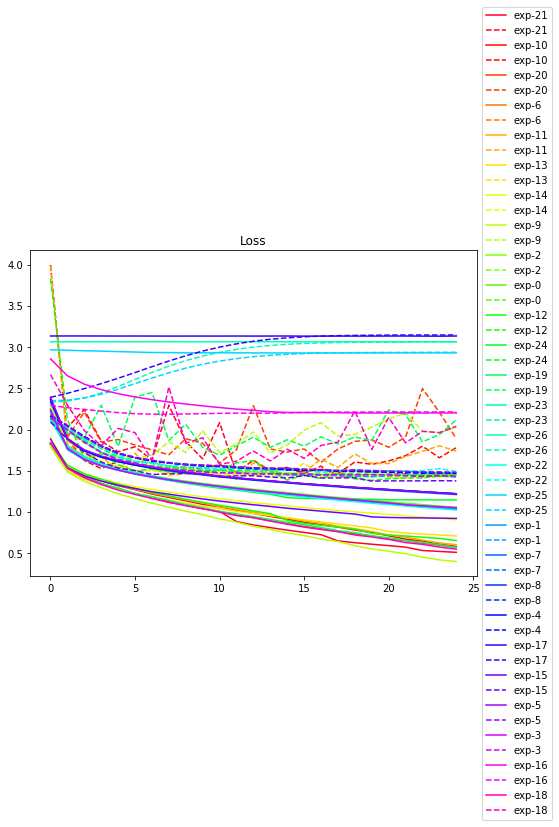

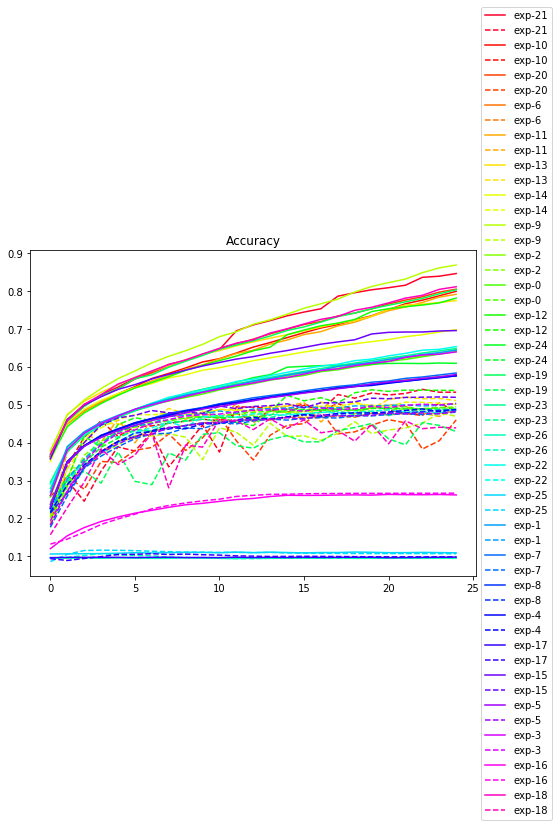

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()